<a href="https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Networks

This notebook explains various ways of implementing single-layer and multi-layer neural networks. The implementations are arranged by concrete (explicit) to abstract order so that one can understand the process black-boxed by deep learning frameworks.

In order to focus on explaining the internals of training, this notebook uses a simple and classic example: *threshold logic units*.
Supposing $x=0$ as *false* and $x=1$ as *true*, single-layer neural networks can realize logic units such as AND ($\wedge$), OR ($\vee$), NOT ($\lnot$), and NAND ($|$). Multi-layer neural networks can realize logical compounds such as XOR.

| $x_1$ | $x_2$ | AND | OR | NAND | XOR |
| :---: |:-----:|:---:|:--:|:----:|:---:|
| 0 | 0 | 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 0 | 0 |


## Using numpy

In [1]:
import numpy as np

### Single-layer perceptron

A single layer perceptron predicts a binary label $\hat{y} \in \{0, 1\}$ for a given input vector $\boldsymbol{x} \in \mathbb{R}^d$ ($d$ presents the number of dimensions of inputs) by using the following formula,
$$
\hat{y} = g(\boldsymbol{w} \cdot \boldsymbol{x} + b) = g(w_1 x_1 + w_2 x_2 + ... + w_d x_d + b)
$$

Here, $\boldsymbol{w} \in \mathbb{R}^d$ is a weight vector; $b \in \mathbb{R}$ is a bias weight; and $g(.)$ denotes a Heaviside step function (we assume $g(0)=0$).

For simplicity, let us consider examples with two-dimensional inputs ($d=2$).
We can represent an input vector $\boldsymbol{x} \in \mathbb{R}^2$ and weight vector $\boldsymbol{w} \in \mathbb{R}^2$ with `numpy.array`. We also define the bias term $b$.

In [2]:
x = np.array([0, 1])
w = np.array([1.0, 1.0])
b = 1.0

The following code computes $\boldsymbol{w} \cdot \boldsymbol{x} + b$,


In [3]:
np.dot(x, w) + b

2.0

Applying Heaviside step function $g$ to the result yields a binary label $\hat{y}$,

In [4]:
np.heaviside(np.dot(x, w) + b, 0)

1.0

#### Including the bias term into the weight vector

For concise implementation, we include a bias term `b` as an additional dimension to the weight vector `w`. More concretely, we append an element with the value of $1$ to each input,
$$
\boldsymbol{x} = (0, 1) \rightarrow \boldsymbol{x}' = (0, 1, 1)
$$
and expand the dimension of the weight vector $\boldsymbol{w} \in \mathbb{R}^{3}$.

Then, the formula of the single-layer perceptron becomes,
$$
\hat{y} = g((w_1, w_2, w_3) \cdot \boldsymbol{x}') = g(w_1 x_1 + w_2 x_2 + w_3)
$$
In other words, $w_1$ and $w_2$ present weights for $x_1$ and $x_2$, respectively, and $w_3$ does a bias weight.

In [5]:
x = np.array([0, 1, 1])
w = np.array([1.0, 1.0, 1.0])

We can simplify the code to predict a binary label $\hat{y}$,

In [6]:
np.heaviside(np.dot(x, w), 0)

1.0

#### Training a NAND gate

Let's train a NAND gate with two inputs. More specifically, we want to find a weight vector $\boldsymbol{w}$ and a bias weight $b$ of a single-layer perceptron that realizes the truth table of the NAND gate: $\{0,1\}^2 \to \{0,1\}$.

| $x_1$ | $x_2$ | $y$  |
| :---: |:-----:|:----:|
| 0 | 0 | 1|
| 0 | 1 | 1|
| 1 | 0 | 1|
| 1 | 1 | 0|

We convert the truth table into a training set consisting of all mappings of the NAND gate,
$$
\boldsymbol{x}_1 = (0, 0), y_1 = 1 \\
\boldsymbol{x}_2 = (0, 1), y_2 = 1 \\
\boldsymbol{x}_3 = (1, 0), y_3 = 1 \\
\boldsymbol{x}_4 = (1, 1), y_4 = 0 \\
$$

As explained earlier, we include the bias term into the last dimension.
$$
\boldsymbol{x}'_1 = (0, 0, 1), y_1 = 1 \\
\boldsymbol{x}'_2 = (0, 1, 1), y_2 = 1 \\
\boldsymbol{x}'_3 = (1, 0, 1), y_3 = 1 \\
\boldsymbol{x}'_4 = (1, 1, 1), y_4 = 0 \\
$$

The code below implements Rosenblatt's perceptron algorithm with a fixed number of iterations (50 times). We use a constant learning rate 0.5 for simplicity.


In [7]:
import random
import numpy as np

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(50):
    # Pick an instance index (i) at random.
    i = random.choice(range(len(y)))
    # Predict the label for the instance x[i] with the current parameter w.
    y_pred = np.heaviside(np.dot(x[i], w), 0)
    # Show the detail of the instance and the current parameter.
    print(f'#{t}: i={i}, x={x[i]}, w={w}, y={y[i]}, y_pred={y_pred}, y_err={y[i] - y_pred}')
    # Update the parameter.
    w += (y[i] - y_pred) * eta * x[i]

#0: i=0, x=[0 0 1], w=[0. 0. 0.], y=1, y_pred=0.0, y_err=1.0
#1: i=1, x=[0 1 1], w=[0.  0.  0.5], y=1, y_pred=1.0, y_err=0.0
#2: i=0, x=[0 0 1], w=[0.  0.  0.5], y=1, y_pred=1.0, y_err=0.0
#3: i=3, x=[1 1 1], w=[0.  0.  0.5], y=0, y_pred=1.0, y_err=-1.0
#4: i=1, x=[0 1 1], w=[-0.5 -0.5  0. ], y=1, y_pred=0.0, y_err=1.0
#5: i=3, x=[1 1 1], w=[-0.5  0.   0.5], y=0, y_pred=0.0, y_err=0.0
#6: i=2, x=[1 0 1], w=[-0.5  0.   0.5], y=1, y_pred=0.0, y_err=1.0
#7: i=3, x=[1 1 1], w=[0. 0. 1.], y=0, y_pred=1.0, y_err=-1.0
#8: i=2, x=[1 0 1], w=[-0.5 -0.5  0.5], y=1, y_pred=0.0, y_err=1.0
#9: i=1, x=[0 1 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#10: i=1, x=[0 1 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#11: i=2, x=[1 0 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#12: i=0, x=[0 0 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#13: i=2, x=[1 0 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#14: i=1, x=[0 1 1], w=[ 0.  -0.5  1. ], y=1, y_pred=1.0, y_err=0.0
#15: i=0,

We can confirm the learned parameter and classification results.

In [8]:
w

array([-0.5, -0.5,  1. ])

In [9]:
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 0.])

### Single-layer perceptron with mini-batch

It is desireable to reduce execusions run by the Python interpreter, which is extremely slow. The common technique to speed up a machine-learning code written in Python is to execute computations within the matrix library (e.g., numpy).

The single-layer perceptron makes predictions for four inputs,
$$
\hat{y}_1 = g(\boldsymbol{x}_1 \cdot \boldsymbol{w}) \\
\hat{y}_2 = g(\boldsymbol{x}_2 \cdot \boldsymbol{w}) \\
\hat{y}_3 = g(\boldsymbol{x}_3 \cdot \boldsymbol{w}) \\
\hat{y}_4 = g(\boldsymbol{x}_4 \cdot \boldsymbol{w}) \\
$$

Here, we define $\hat{Y} \in \mathbb{R}^{4 \times 1}$ and $X \in \mathbb{R}^{4 \times d}$ as,
$$
\hat{Y} = \begin{pmatrix} 
  \hat{y}_1 \\ 
  \hat{y}_2 \\ 
  \hat{y}_3 \\ 
  \hat{y}_4 \\ 
\end{pmatrix},
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}
$$

Then, we can write the four predictions in one dot-product computation,
$$
\hat{Y} = X \cdot \boldsymbol{w}
$$

The code below implements this idea. The function `np.heaviside()` yields a vector corresponding to the four predictions, applying the step function for every element of the argument.

This technique is frequently used in mini-batch training.

In [10]:
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
w = np.array([1.0, 0.5, -0.5])
np.heaviside(np.dot(x, w), 0)

array([0., 0., 1., 1.])

The code below applies the Perceptron algorithm with mini-batch.

In [11]:
import numpy as np

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(10):
    y_pred = np.heaviside(np.dot(x, w), 0)
    print(f'#{t}: w={w}, Y={y}, Ypred={y_pred}, Yerr={y-y_pred}, dw={np.dot((y - y_pred), x)}')
    w += eta * np.dot((y - y_pred), x)

#0: w=[0. 0. 0.], Y=[1 1 1 0], Ypred=[0. 0. 0. 0.], Yerr=[1. 1. 1. 0.], dw=[1. 1. 3.]
#1: w=[0.5 0.5 1.5], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#2: w=[0. 0. 1.], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#3: w=[-0.5 -0.5  0.5], Y=[1 1 1 0], Ypred=[1. 0. 0. 0.], Yerr=[0. 1. 1. 0.], dw=[1. 1. 2.]
#4: w=[0.  0.  1.5], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#5: w=[-0.5 -0.5  1. ], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#6: w=[-0.5 -0.5  1. ], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#7: w=[-0.5 -0.5  1. ], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#8: w=[-0.5 -0.5  1. ], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#9: w=[-0.5 -0.5  1. ], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]


We can confirm the learned parameter and classification results.

In [12]:
w

array([-0.5, -0.5,  1. ])

In [13]:
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 0.])

### Stochastic gradient descent (SGD) with mini-batch

In [14]:
import numpy as np

def sigmoid(v):
    return 1.0 / (1 + np.exp(-v))

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(100):
    y_pred = sigmoid(np.dot(x, w))
    print(f'#{t}: w={w}, Y={y}, Ypred={y_pred}, Yerr={y-y_pred}, dw={np.dot((y - y_pred), x)}')
    w -= eta * np.dot((y_pred - y), x)

#0: w=[0. 0. 0.], Y=[1 1 1 0], Ypred=[0.5 0.5 0.5 0.5], Yerr=[ 0.5  0.5  0.5 -0.5], dw=[0. 0. 1.]
#1: w=[0.  0.  0.5], Y=[1 1 1 0], Ypred=[0.62245933 0.62245933 0.62245933 0.62245933], Yerr=[ 0.37754067  0.37754067  0.37754067 -0.62245933], dw=[-0.24491866 -0.24491866  0.51016268]
#2: w=[-0.12245933 -0.12245933  0.75508134], Y=[1 1 1 0], Ypred=[0.68028489 0.65308376 0.65308376 0.62484461], Yerr=[ 0.31971511  0.34691624  0.34691624 -0.62484461], dw=[-0.27792836 -0.27792836  0.38870299]
#3: w=[-0.26142351 -0.26142351  0.94943283], Y=[1 1 1 0], Ypred=[0.7210011  0.66552394 0.66552394 0.6050581 ], Yerr=[ 0.2789989   0.33447606  0.33447606 -0.6050581 ], dw=[-0.27058204 -0.27058204  0.34289291]
#4: w=[-0.39671453 -0.39671453  1.12087929], Y=[1 1 1 0], Ypred=[0.75415178 0.67352346 0.67352346 0.58113885], Yerr=[ 0.24584822  0.32647654  0.32647654 -0.58113885], dw=[-0.25466231 -0.25466231  0.31766244]
#5: w=[-0.52404569 -0.52404569  1.27971051], Y=[1 1 1 0], Ypred=[0.7824005  0.68041178 0.68041

In [15]:
w

array([-4.25676443, -4.25676443,  6.57684888])

In [16]:
sigmoid(np.dot(x, w))

array([0.99860971, 0.91052682, 0.91052682, 0.12601305])

## Automatic differentiation

Consider a loss function,
$$
l_{\boldsymbol{x}}(\boldsymbol{w}) = - \log \sigma(\boldsymbol{w} \cdot \boldsymbol{x}) = - \log \frac{1}{1 + e^{-\boldsymbol{w} \cdot \boldsymbol{x}}}
$$

This section shows implementations in different libraries of deep learning for computing the loss value $l_{\boldsymbol{x}}(\boldsymbol{w})$ and gradients $\frac{\partial l_{\boldsymbol{x}}(\boldsymbol{w})}{\partial \boldsymbol{w}}$ when $\boldsymbol{x} = (1, 1, 1)$ and $\boldsymbol{w} = (1, 1, -1.5)$.

### Using autograd

See: https://github.com/HIPS/autograd

In [17]:
import autograd
import autograd.numpy as np

def loss(w, x):
    return -np.log(1.0 / (1 + np.exp(-np.dot(x, w))))

x = np.array([1, 1, 1])
w = np.array([1.0, 1.0, -1.5])

grad_loss = autograd.grad(loss)
print(loss(w, x))
print(grad_loss(w, x))

0.47407698418010663
[-0.37754067 -0.37754067 -0.37754067]


### Using pytorch

See: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [18]:
import torch

dtype = torch.float

x = torch.tensor([1, 1, 1], dtype=dtype)
w = torch.tensor([1.0, 1.0, -1.5], dtype=dtype, requires_grad=True)

loss = -torch.dot(x, w).sigmoid().log()
loss.backward()
print(loss.item())
print(w.grad)

0.4740769565105438
tensor([-0.3775, -0.3775, -0.3775])


### Using TensorFlow Eager

See: https://www.tensorflow.org/guide/autodiff

In [19]:
import tensorflow as tf

dtype = tf.float32

x = tf.constant([1, 1, 1], dtype=dtype, name='x')
w = tf.Variable([1.0, 1.0, -1.5], dtype=dtype, name='w')

with tf.GradientTape() as tape:
    loss = -tf.math.log(tf.math.sigmoid(tf.tensordot(x, w, 1)))

print(loss.numpy())
print(tape.gradient(loss, w))

0.47407696
tf.Tensor([-0.37754062 -0.37754062 -0.37754062], shape=(3,), dtype=float32)


### Using JAX

See: https://github.com/google/jax

In [20]:
import jax
import jax.numpy as jnp

def loss(w, x):
    return -jnp.log(1.0 / (1 + jnp.exp(-jnp.dot(x, w))))

x = jnp.array([1, 1, 1])
w = jnp.array([1.0, 1.0, -1.5])

grad_loss = jax.jit(jax.grad(loss))
print(loss(w, x))
print(grad_loss(w, x))

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


0.47407693
[-0.37754068 -0.37754068 -0.37754068]


## Implementing neural networks with pytorch

### Single-layer neural network using automatic differentiation

In [21]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype) # 4 rows x 3 cols
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)                         # 4 rows x 1 col
w = torch.randn(3, 1, dtype=dtype, requires_grad=True)                      # 3 rows x 1 col

loss_history = []               # Used for plotting loss values.

eta = 0.5
for t in range(100):
    # y_pred = \sigma(x \cdot w)
    y_pred = x.mm(w).sigmoid()                                              # 4 rows x 1 col
    # '*' computes an element-wise multiplication.
    ll = y * y_pred + (1 - y) * (1 - y_pred)                                # 4 rows x 1 col
    loss = -ll.log().sum()      # The loss value.                           # scalar
    loss.backward()             # Compute the gradients of the loss.

    loss_history.append(loss.item())    # Record the loss value.
    print(f'#{t}: w={w.t().data[0].numpy()}, loss={loss.item()}')

    with torch.no_grad():
        w -= eta * w.grad       # Update weights using SGD.        
        w.grad.zero_()          # Clear the gradients for the next iteration.

#0: w=[-0.2504265  -0.3864392  -0.00692784], loss=2.8579354286193848
#1: w=[-0.14062834 -0.26008746  0.65228283], loss=2.2319412231445312
#2: w=[-0.23450655 -0.33977407  0.93123674], loss=2.0644869804382324
#3: w=[-0.36238948 -0.45577615  1.1228404 ], loss=1.9364885091781616
#4: w=[-0.49090773 -0.5739913   1.2866418 ], loss=1.8254680633544922
#5: w=[-0.6130432  -0.68708944  1.4372239 ], loss=1.7276976108551025
#6: w=[-0.7277143  -0.79380304  1.5789366 ], loss=1.6409716606140137
#7: w=[-0.8353015 -0.8943712  1.7134297], loss=1.5635381937026978
#8: w=[-0.9364883  -0.98935914  1.8415844 ], loss=1.4939686059951782
#9: w=[-1.0319594 -1.0793494  1.9640284], loss=1.4310965538024902
#10: w=[-1.12233   -1.164868   2.0812783], loss=1.373964548110962
#11: w=[-1.2081361 -1.2463737  2.193782 ], loss=1.321784257888794
#12: w=[-1.289842  -1.324263   2.3019345], loss=1.2739031314849854
#13: w=[-1.3678492 -1.3988785  2.4060857], loss=1.2297775745391846
#14: w=[-1.4425061 -1.4705172  2.5065472], loss=1.

Text(0, 0.5, 'Loss')

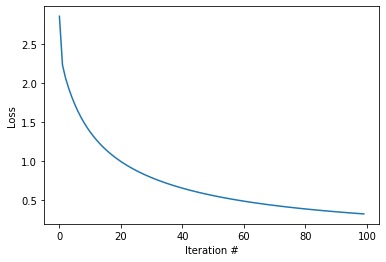

In [22]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [23]:
w

tensor([[-4.2760],
        [-4.2762],
        [ 6.6056]], requires_grad=True)

In [24]:
x.mm(w).sigmoid()

tensor([[0.9986],
        [0.9113],
        [0.9113],
        [0.1249]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network using automatic differentiation

In [25]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
w1 = torch.randn(3, 2, dtype=dtype, requires_grad=True)
w2 = torch.randn(2, 1, dtype=dtype, requires_grad=True)
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

loss_history = []               # Used for plotting loss values.

eta = 0.5
for t in range(1000):
    # y_pred = \sigma(w_2 \cdot \sigma(x \cdot w_1) + b_2)
    y_pred = x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()
    ll = y * y_pred + (1 - y) * (1 - y_pred)
    loss = -ll.log().sum()
    loss.backward()

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')

    with torch.no_grad():
        # Update weights using SGD.
        w1 -= eta * w1.grad
        w2 -= eta * w2.grad
        b2 -= eta * b2.grad
        
        # Clear the gradients for the next iteration.
        w1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

Text(0, 0.5, 'Loss')

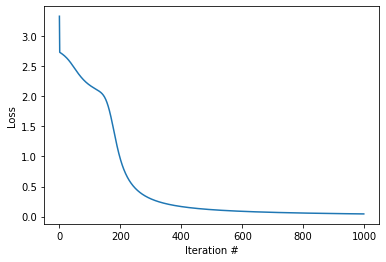

In [26]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [27]:
print(w1)
print(w2)
print(b2)

tensor([[-7.5757,  7.1097],
        [ 7.7633, -6.7982],
        [ 3.8358,  3.4002]], requires_grad=True)
tensor([[-9.7400],
        [-9.8146]], requires_grad=True)
tensor([[14.4016]], requires_grad=True)


In [28]:
x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()

tensor([[0.0097],
        [0.9872],
        [0.9874],
        [0.0086]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with high-level NN modules

In [29]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Used for plotting loss values.
loss_history = []

eta = 0.5
for t in range(100):
    y_pred = model(x)                   # Make predictions.
    loss = loss_fn(y_pred, y)           # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    model.zero_grad()                   # Zero-clear the gradients.
    loss.backward()                     # Compute the gradients.
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   # Update the parameters using SGD.

Text(0, 0.5, 'Loss')

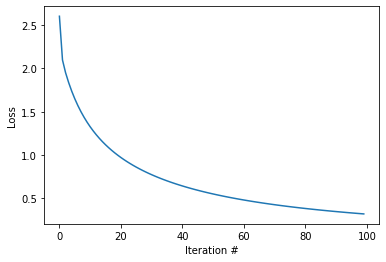

In [30]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [31]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-4.2924, -4.2922]])),
             ('0.bias', tensor([6.6297]))])

In [32]:
model(x).sigmoid()

tensor([[0.9987],
        [0.9119],
        [0.9119],
        [0.1240]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network with high-level NN modules

In [33]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),   # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(),                 # Sigmoid function
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Used for plotting loss values.
loss_history = []

eta = 0.5
for t in range(1000):
    y_pred = model(x)                   # Make predictions.
    loss = loss_fn(y_pred, y)           # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    model.zero_grad()                   # Zero-clear the gradients.
    loss.backward()                     # Compute the gradients.
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   # Update the parameters using SGD.

Text(0, 0.5, 'Loss')

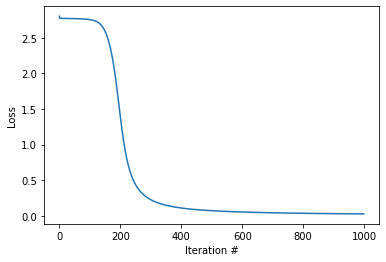

In [34]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [35]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 6.7121, -6.4448],
                      [ 6.5432, -6.7463]])),
             ('0.bias', tensor([ 3.2118, -3.4964])),
             ('2.weight', tensor([[-11.1168,  11.6217]])),
             ('2.bias', tensor([5.2289]))])

In [36]:
model(x).sigmoid()

tensor([[0.0060],
        [0.9919],
        [0.9946],
        [0.0051]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with an optimizer.

In [37]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(100):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

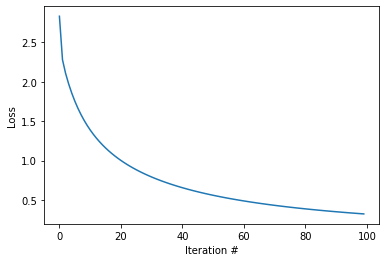

In [38]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [39]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-4.2711, -4.2715]])),
             ('0.bias', tensor([6.5984]))])

In [40]:
model(x).sigmoid()

tensor([[0.9986],
        [0.9111],
        [0.9111],
        [0.1252]], grad_fn=<SigmoidBackward>)

### Multi-layer neural networks using an optimizer

In [41]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),   # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(),                 # Sigmoid function
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(1000):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

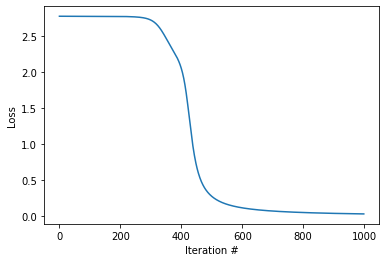

In [42]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [43]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 5.9093, -6.2137],
                      [ 6.9247, -6.8088]])),
             ('0.bias', tensor([-3.1349,  3.4622])),
             ('2.weight', tensor([[ 11.0530, -10.4144]])),
             ('2.bias', tensor([4.8524]))])

In [44]:
model(x).sigmoid()

tensor([[0.0083],
        [0.9890],
        [0.9922],
        [0.0071]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with a customizable NN class.

In [45]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network model.
class SingleLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_out):
        super(SingleLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_out, bias=True)

    def forward(self, x):
        return self.linear1(x)

model = SingleLayerNN(2, 1)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(100):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

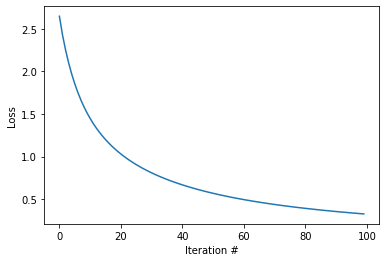

In [46]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [47]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[-4.2529, -4.2528]])),
             ('linear1.bias', tensor([6.5710]))])

In [48]:
model(x).sigmoid()

tensor([[0.9986],
        [0.9104],
        [0.9104],
        [0.1262]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network with a customizable NN class.



In [49]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network model.
class ThreeLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_hidden, d_out):
        super(ThreeLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_hidden, bias=True)
        self.linear2 = torch.nn.Linear(d_hidden, d_out, bias=True)

    def forward(self, x):
        return self.linear2(self.linear1(x).sigmoid())

model = ThreeLayerNN(2, 2, 1)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(1000):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

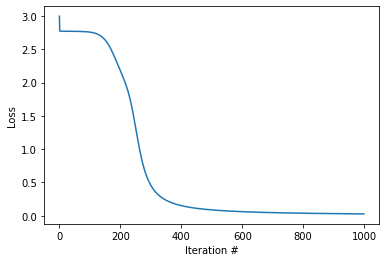

In [50]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [51]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[5.1579, 5.1555],
                      [7.0274, 7.0144]])),
             ('linear1.bias', tensor([-7.8934, -3.1712])),
             ('linear2.weight', tensor([[-12.0983,  11.3091]])),
             ('linear2.bias', tensor([-5.2382]))])

In [52]:
model(x).sigmoid()

tensor([[0.0083],
        [0.9939],
        [0.9939],
        [0.0064]], grad_fn=<SigmoidBackward>)